# Modèles linéaires: régression logistique

CSI 4506 - automne 2024

Marcel Turcotte  
Version: sept. 30, 2024 08h54

# Préambule

## Citation du jour

“La prochaine saison du [#podcast
#Complexity](https://santafe.edu/culture/podcasts), ‘**La nature de
l’intelligence**’, explore cette question à travers des conversations
avec des **cognitivistes** et des **neuroscientifiques**, des
**chercheurs en cognition animale** et des **experts en IA** en six
épisodes.”

## Objectifs d’apprentissage

-   **Différencier** entre les paradigmes de classification binaire et
    de classification multi-classes.
-   **Décrire** une méthodologie pour convertir des problèmes de
    classification multi-classes en tâches de classification binaire.
-   **Articuler** le concept de frontière de décision et son importance
    dans les tâches de classification.
-   **Implémenter** un algorithme de régression logistique, en se
    concentrant sur son application aux problèmes de classification.

# Tâches de classification

## Définitions

-   La **classification binaire** est une tâche d’apprentissage
    supervisé dont l’objectif est de catégoriser des instances
    (exemples) en **deux classes distinctes**.

-   Une tâche de **classification multi-classes** est un type de
    problème d’apprentissage supervisé où l’objectif est de catégoriser
    des instances en **trois classes distinctes ou plus**.

## Classification binaire

-   Certains algorithmes de machine learning sont spécifiquement conçus
    pour résoudre des problèmes de classification binaire.
    -   La **régression logistique** et les **machines à vecteurs de
        support** (SVM) en sont des exemples.

Plus tard dans la présentation, assurez-vous de comprendre pourquoi la
régression logistique est spécifiquement conçue pour résoudre les
problèmes de classification binaire.

## Classification multi-classes

-   Tout **problème de classification multi-classes** peut être
    transformé en un **problème de classification binaire**.
-   **Un-contre-tous (One-vs-All – OvA)**
    -   Un **classificateur binaire distinct** est entraîné **pour
        chaque classe**.
    -   Pour chaque classificateur, **une classe** est traitée comme la
        **classe positive**, et **toutes les autres classes** sont
        traitées comme les **classes négatives**.
    -   L’**attribution finale** d’une étiquette de classe est effectuée
        en fonction du classificateur qui produit le **score de
        confiance le plus élevé** pour une entrée donnée.

Un exemple complet sera présenté à la fin de la présentation.

## Discussion

Pour introduire le concept de **frontière de décision** (*decision
boundary*), réexaminons le jeu de données Iris.

## Chargement du jeu de données Iris

In [1]:
from sklearn.datasets import load_iris

# Load the Iris dataset

iris = load_iris()

import pandas as pd

# Create a DataFrame

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

## Graphiques de dispersion

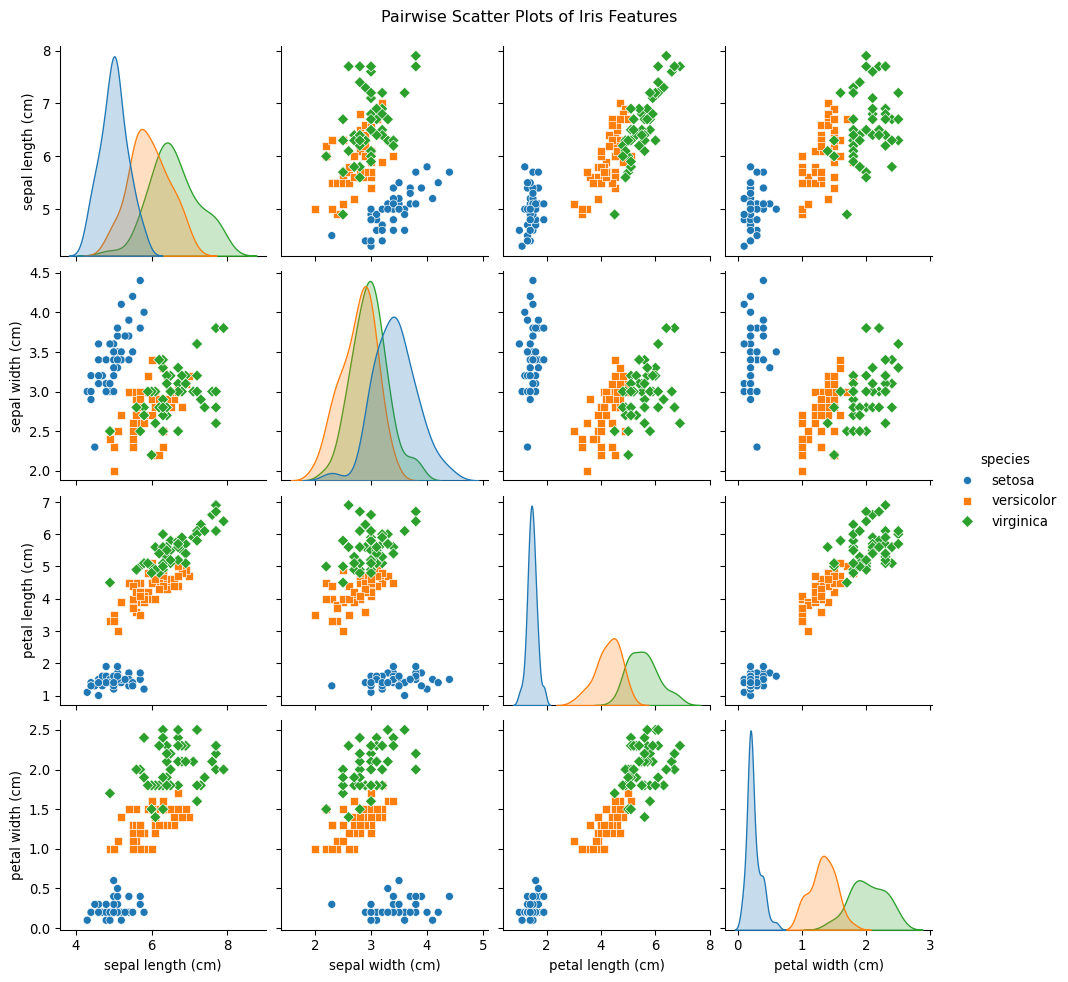

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using string labels to ease visualization

df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display all pairwise scatter plots

sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pairwise Scatter Plots of Iris Features", y=1.02)
plt.show()

En examinant les graphiques de dispersion, il est évident qu’il est
relativement facile de distinguer **Setosa** des **deux autres
variétés** (Versicolor et Virginica). En revanche, séparer Versicolor de
Virginica présente un défi plus grand, car leurs distributions se
chevauchent dans tous les graphiques univariés affichés sur la
diagonale.

Ici, nous définissons un problème de classification **Un-contre-tous**
pour déterminer si un exemple est Setosa ou non. Il est important de
noter que cette approche entraînera un ensemble de données déséquilibré
(*class imbalance*), composé de 50 instances de Setosa et de 100
instances de Non Setosa.

## Un-contre-tous: jeu de données Iris

In [3]:
import numpy as np

# Transform the target variable into binary classification
# 'setosa' (class 0) vs. 'not setosa' (classes 1 and 2)

y_binary = np.where(iris.target == 0, 0, 1)

# Create a DataFrame for easier plotting with Seaborn

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['is_setosa'] = y_binary

print(y_binary)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]

## Un-contre-tous: jeu de données Iris

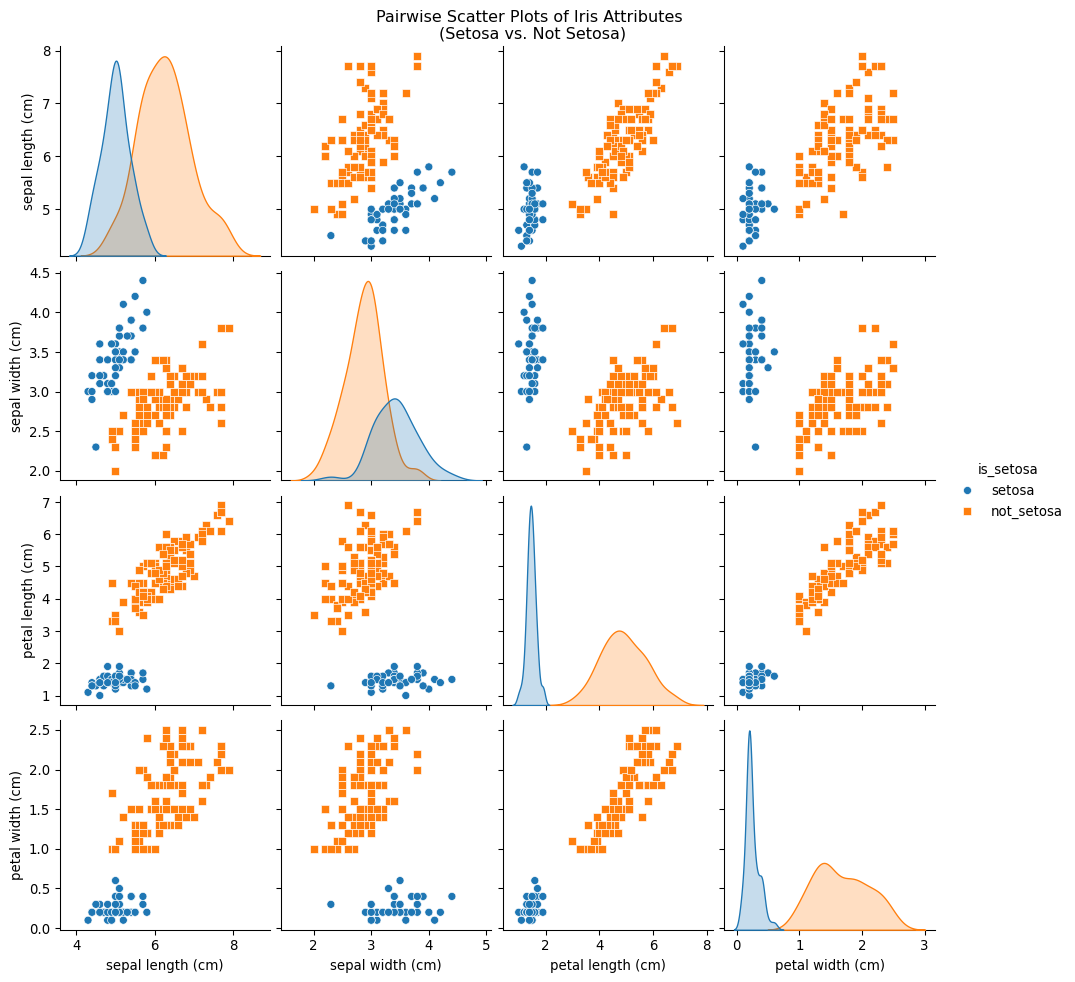

In [4]:
# Using string labels for visualization

df['is_setosa'] = df['is_setosa'].map({0: 'setosa', 1: 'not_setosa'})

# Pairwise scatter plots

sns.pairplot(df, hue='is_setosa', markers=["o", "s"])
plt.suptitle('Pairwise Scatter Plots of Iris Attributes \n(Setosa vs. Not Setosa)', y=1.02)
plt.show()

## Setosa vs Non Setosa

-   Clairement, nous avons **simplifié le problème**.
-   Dans la majorité des graphiques de dispersion, les exemples de
    **Setosa** sont **regroupés ensemble**.

# Frontières de décision

## Définition

Une **frontière de décision** est une limite qui partitionne l’espace
des attributs en **régions** correspondant à des **étiquettes de classe
différentes**.

Le terme **limite** sera clarifié dans les écrans suivants.

## Frontière de décision

Considérons **deux attributs**, par exemple *longueur des pétales* et
*largeur des sépales*, la frontière de décision peut être une **ligne**.

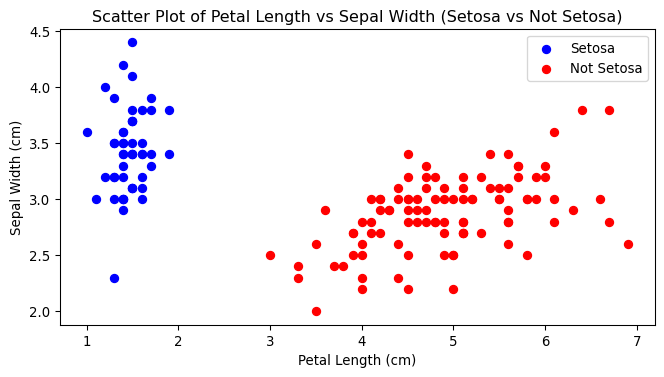

## Frontière de décision

Considérons **deux attributs**, par exemple *longueur des pétales* et
*largeur des sépales*, la frontière de décision peut être une **ligne**.

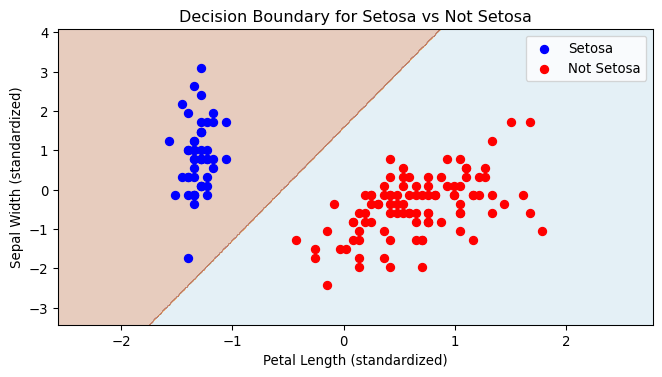

## Définition

On dit que les données sont **linéairement séparables** lorsque deux
classes de données peuvent être parfaitement séparées par une **unique
frontière linéaire**, telle qu’une **ligne** dans un **espace
bidimensionnel** ou un **hyperplan dans des dimensions supérieures**.

## Frontière de décision simple

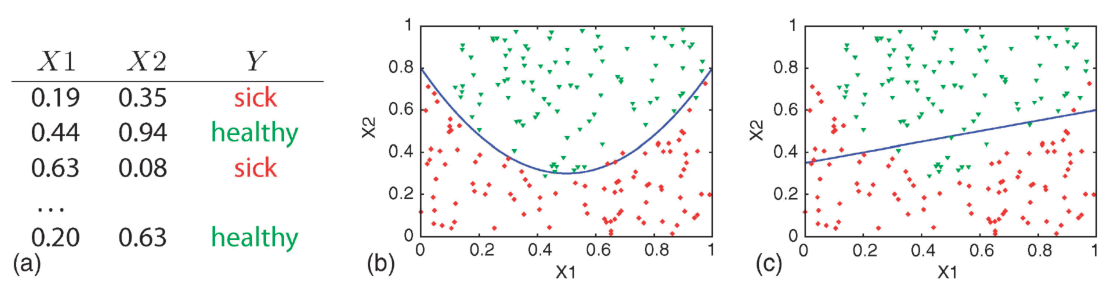

*(a)* données d’entraînement, *(b)* courbe quadratique, et *(c)*
fonction linéaire.

**Attribution :** Geurts, P., Irrthum, A. & Wehenkel, L. Supervised
learning with decision tree-based methods in computational and systems
biology. *Mol Biosyst* **5** 1593–1605 (2009).

Le tableau de gauche présente les données d’entraînement pour une
hypothétique **tâche de classification binaire** dans un contexte
médical, où les deux attributs, $X_1$ et $X_2$, sont utilisés pour
prédire la variable cible, $y$, qui peut prendre deux valeurs : *malade*
et *sain*. Vous pouvez imaginer que $X_1$ et $X_2$ sont des mesures,
telles que la pression artérielle et le rythme cardiaque ou les niveaux
de cholestérol et de glucose.

La **régression logistique** (c) utilise une **frontière de décision**
linéaire. Dans cet exemple spécifique, la frontière de décision est
représentée par une ligne droite. L’utilisation de la régression
logistique pour ce problème entraîne plusieurs erreurs de classification
: les points rouges au-dessus de la ligne, qui devraient être classés
comme ‘malade’, sont incorrectement prédits comme ‘sain’. À l’inverse,
les points verts en dessous de la ligne, qui devraient être classés
comme ‘sain’, sont incorrectement prédits comme ‘malade’.

## Frontière de décision complexe

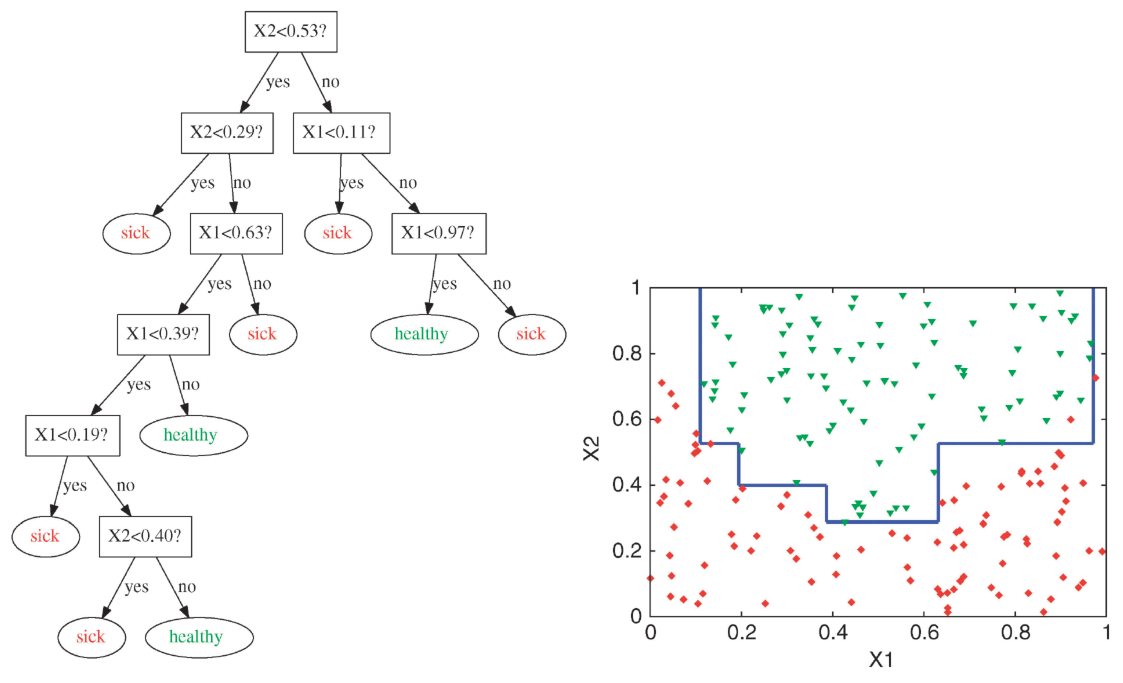

Les **arbres de décision** sont capables de générer des frontières de
décision **irrégulières** et **non linéaires**.

**Attribution:** *ibidem*.

Assurez-vous de comprendre les relations entre les huit règles de
décision délimitées dans l’arbre de décision et les neuf segments de
ligne représentés dans le graphique de dispersion.

## Frontière de décision

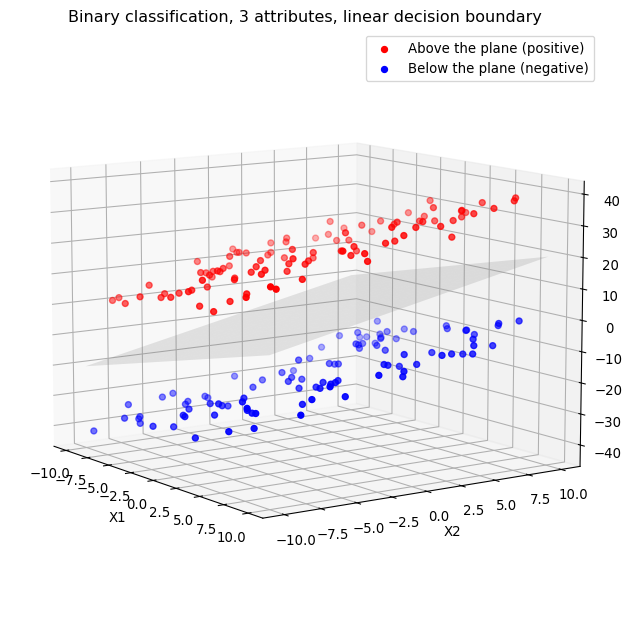

## Digression

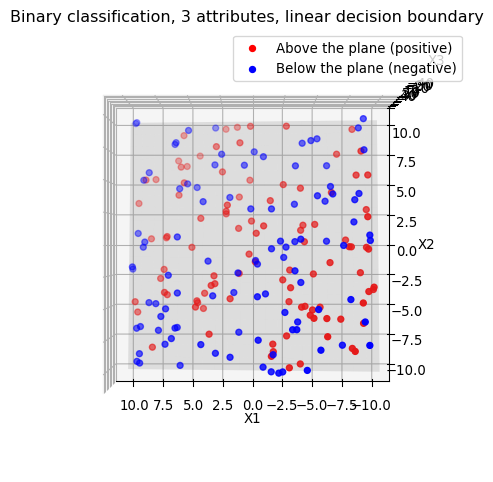

Veuillez noter qu’il est impossible de séparer les données en utilisant
seulement les deux attributs, $x1$ et $x2$. Cependant, en incorporant un
troisième attribut, $x3$, les données deviennent linéairement
séparables, comme on peut le voir sur l’écran précédent.

## Frontière de décision

-   **2 attributs**, la *frontière de décision linéaire* serait une
    **ligne**.
-   **2 attributs**, la *frontière de décision non-linéaire* serait une
    **courbe non-linéaire**.
-   **3 attributs**, la *frontière de décision linéaire* serait un
    **plan**.
-   **3 attributs**, la *frontière de décision non-linéaire* serait une
    **surface non-linéaire**.
-   **$\gt$ 3 attributs**, la *frontière de décision linéaire* serait un
    **hyperplan**.
-   **$\gt$ 3 attributs**, la *frontière de décision non-linéaire*
    serait une **hypersurface**.

En apprentissage automatique, il est courant que les problèmes
impliquent des centaines voire des milliers d’attributs, rendant la
visualisation directe infaisable.

En particulier, une *frontière de décision non-linéaire* dans un espace
de haute dimension est souvent conceptualisée comme une variété
(*manifold*) non-linéaire.

## Définition (révisée)

Une **frontière de décision** est une hypersurface qui partitionne
l’espace des attributs en **régions** correspondant à **différentes
étiquettes de classe**.

# Régression logistique

## Régression logistique (Logit)

-   Malgré son nom, la **régression logistique** sert de **technique de
    classification** plutôt que de méthode de régression.

-   Les **étiquettes** en régression logistique sont des valeurs
    binaires, notées $y_i \in \{0,1\}$, ce qui en fait une **tâche de
    classification binaire**.

-   L’objectif principal de la régression logistique est de déterminer
    la **probabilité** qu’un exemple donné $x_i$ appartienne à la
    **classe positive**, c’est-à-dire $y_i = 1$.

La représentation des deux classes, **négative** et **positive**, par
les valeurs 0 et 1 respectivement, n’est pas arbitraire. Ce choix est
intrinsèquement lié à notre objectif de déterminer la **probabilité**
qu’une instance $x_i$ appartienne à la classe positive.

Bien que cet algorithme d’apprentissage puisse sembler peu remarquable
au départ, il est essentiel de continuer à s’y intéresser, car la
régression logistique s’avérera plus tard cruciale dans la discussion
sur les réseaux de neurones artificiels.

## Régression logistique

Considérons **un seul attribut**, par exemple *longueur des pétales*, et
la valeur de l’étiquette (0, 1).

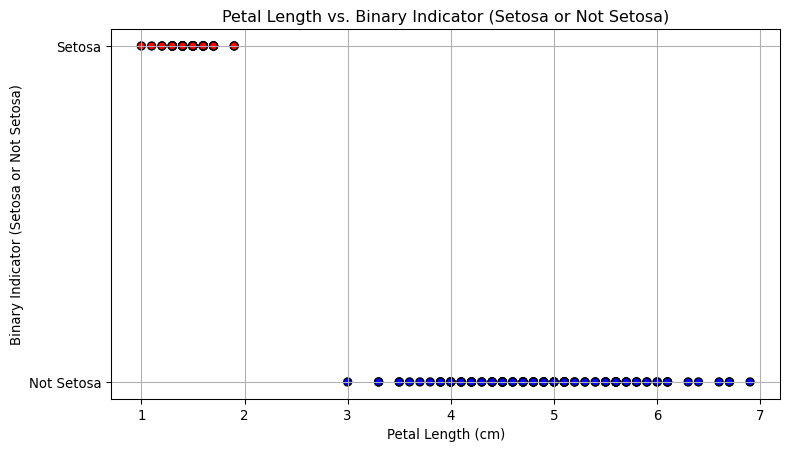

## Ajuster une régression linéaire

### $\ldots$ n’est pas la solution

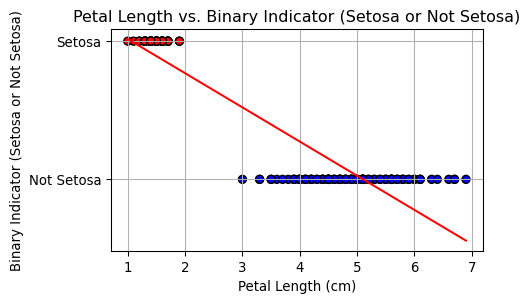

**La ligne résultante s’étend à l’infini dans les deux directions**,
mais notre objectif est de contraindre les valeurs entre 0 et 1. Ici, 1
indique une **forte probabilité** que $x_i$ appartienne à la classe
positive, tandis qu’une valeur proche de 0 indique une **faible
probabilité**.

Ce modèle présente néanmoins des éléments intéressants. Une valeur
élevée de la fonction correspond à des exemples de la classe positive
(Setosa, 1), tandis qu’une valeur faible de la fonction indique des
exemples de la classe négative (Non-Setosa, 0).

## Fonction logistique

La **fonction logistique standard** transforme une entrée à valeur
réelle de $\mathbb{R}$ en l’intervalle ouvert $(0,1).$ La fonction est
définie comme suit :

$$
  \sigma(t) = \frac{1}{1+e^{-t}}
$$

![](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

**Attribution:**
[Wikipedia](https://en.wikipedia.org/wiki/Logistic_function)

-   Lorsque la variable d’entrée $t$ est égale à 0, la sortie de la
    fonction logistique est de 0,5.
-   À mesure que $t$ augmente, la valeur de sortie se rapproche de 1.
-   Inversement, à mesure que $t$ devient plus négatif, la valeur de
    sortie se rapproche de 0.
-   La fonction logistique standard est également couramment appelée
    **fonction sigmoïde**.

## Régression logistique (intuition)

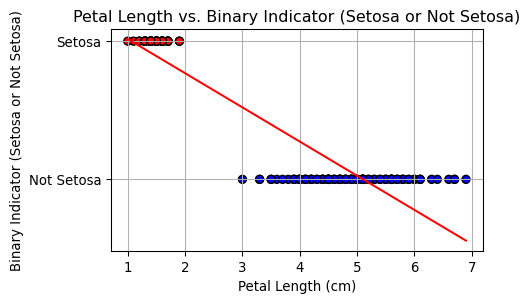

![](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

-   Lorsque la **distance à la frontière de décision** est **nulle**,
    l’incertitude est élevée, rendant une probabilité de **0,5**
    appropriée.
-   À mesure que nous nous éloignons de la frontière de décision, la
    confiance augmente, justifiant des probabilités **plus élevées** ou
    **plus basses** en conséquence.

## Fonction logistique

Une courbe en forme de S, telle que la fonction logistique standard
(également appelée **sigmoïde**), est qualifiée de **fonction
d’écrasement** (*squashing function*) car elle transforme un large
domaine d’entrée en une plage de sortie restreinte.

![](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

$$
  \sigma(t) = \frac{1}{1+e^{-t}}
$$

**Attribution:**
[Wikipedia](https://en.wikipedia.org/wiki/Logistic_function)

## Régression Logistique (Logit)

-   De manière analogue à la **régression linéaire**, la **régression
    logistique** calcule une somme pondérée des attributs d’entrée,
    exprimée comme suit : $$
    \theta_0 + \theta_1 x_i^{(1)} + \theta_2 x_i^{(2)} + \ldots + \theta_D x_i^{(D)}
    $$

-   Cependant, l’utilisation de la fonction sigmoïde limite sa sortie à
    l’intervalle $(0,1)$ : $$
    \sigma(\theta_0 + \theta_1 x_i^{(1)} + \theta_2 x_i^{(2)} + \ldots + \theta_D x_i^{(D)})
    $$

## Régression logistique

Le modèle de **Régression Logistique**, sous sa forme vectorisée, est
défini comme suit : $$
h_\theta(x_i) = \sigma(\theta x_i) = \frac{1}{1+e^{- \theta x_i}}
$$

## Régression logistique (deux attributs)

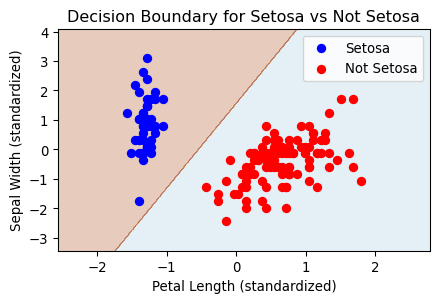

$$
  h_\theta(x_i) = \sigma(\theta x_i)
$$

-   **La probabilité de classer correctement un exemple augmente à
    mesure que sa distance par rapport à la frontière de décision
    augmente**.
-   Ce principe s’applique aussi bien aux classes **positives** qu’aux
    classes **négatives**.
-   Un exemple situé sur la frontière de décision a une **probabilité de
    50%** d’appartenir à l’une ou l’autre des classes.

## Régression logistique

-   Le modèle de **Régression Logistique**, sous sa forme vectorisée,
    est défini comme suit : $$
    h_\theta(x_i) = \sigma(\theta x_i) = \frac{1}{1+e^{- \theta x_i}}
    $$

-   Les **prédictions** sont faites comme suit :

    -   $y_i = 0$, si $h_\theta(x_i) < 0.5$
    -   $y_i = 1$, si $h_\theta(x_i) \geq 0.5$

. . .

-   Les valeurs de $\theta$ sont apprises en utilisant la **descente de
    gradient**.

------------------------------------------------------------------------

<https://youtu.be/yIYKR4sgzI8>

**Attribution** : [StatQuest: Logistic
Regression](https://youtu.be/yIYKR4sgzI8) par Josh Starmer.

“StatQuest décompose les méthodes complexes de statistiques et
d’apprentissage automatique en petites sections faciles à comprendre.
StatQuest ne simplifie pas excessivement le matériel ; au contraire, il
vous renforce pour que vous soyez plus intelligent et ayez une meilleure
compréhension des statistiques et de l’apprentissage automatique.” C’est
souvent un bon point de départ pour acquérir l’intuition nécessaire à la
compréhension des concepts statistiques et d’apprentissage automatique.

# Un-contre-Tous

## Un-contre-Tous (complet)

``` python
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Binarize the output
y_bin = label_binarize(y, classes=[0, 1, 2])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)
```

## Un-contre-Tous (complet)

In [14]:
# Train a One-vs-All classifier for each class

classifiers = []
for i in range(3):
    clf = LogisticRegression()
    clf.fit(X_train, y_train[:, i])
    classifiers.append(clf)

Chaque régression logistique trouve un **hyperplan** dans un **espace à
4 dimensions** qui sépare les données en deux classes.

## Un-contre-Tous (complet)

In [15]:
# Predict on a new sample
new_sample = X_test[0].reshape(1, -1)

confidences = [clf.decision_function(new_sample) for clf in classifiers]

# Final assignment
final_class = np.argmax(confidences)

# Printing the result
print(f"Final class assigned: {iris.target_names[final_class]}")
print(f"True class: {iris.target_names[np.argmax(y_test[0])]}")

Final class assigned: versicolor
True class: versicolor

## `label_binarized`

In [16]:
from sklearn.preprocessing import label_binarize
from pprint import pprint

# Original class labels
y_train = np.array([0, 1, 2, 0, 1, 2, 1, 0])

# Binarize the labels
y_train_binarized = label_binarize(y_train, classes=[0, 1, 2])

# Assume y_train_binarized contains the binarized labels
print("Binarized labels:\n", y_train_binarized)

# Convert binarized labels back to the original numerical values
original_labels = [np.argmax(b) for b in y_train_binarized]
print("Original labels:\n", original_labels)

Binarized labels:
 [[1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]]
Original labels:
 [0, 1, 2, 0, 1, 2, 1, 0]

# Chiffres manuscrits

## Chiffres manuscrits

Chargement du jeu de données

In [17]:
from sklearn.datasets import load_digits

digits = load_digits()

Quel est le type de `digits.data`

In [18]:
type(digits.data)

numpy.ndarray

Développement d’un **modèle de régression logistique** pour la
**reconnaissance des chiffres manuscrits** de ce jeux de données de
l’UCI ML.

## Chiffres manuscrits

Combien d’exemples (`N`) et combien d’attributs (`D`)?

In [19]:
digits.data.shape

(1797, 64)

Définition des valeurs de `N` et `D`

In [20]:
N, D = digits.data.shape

`target` a-t-il le même nombre d’entrées (exemples) que `data` ?

In [21]:
digits.target.shape

(1797,)

## Chiffres manuscrits

Quelles sont la largeur et la hauteur de ces images ?

In [22]:
digits.images.shape

(1797, 8, 8)

Définition des valeurs de `width` et `height`

In [23]:
_, width, height = digits.images.shape

## Chiffres manuscrits

Définition des valeurs de `X` et `y`

In [24]:
X = digits.data
y = digits.target

## Chiffres manuscrits

`X[0]` est un vecteur de taille `width * height = D`
($8 \times 8 = 64$).

In [25]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

. . .

Il correspond à une image de $8 \times 8 = 64$.

In [26]:
X[0].reshape(width, height)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

## Chiffres manuscrits

Afficher les `n=5` premiers exemples.

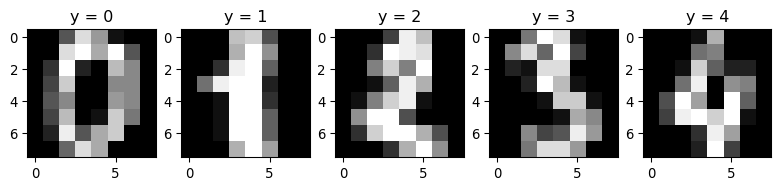

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,2))
n = 5

for index, (image, label) in enumerate(zip(X[0:n], y[0:n])):
    plt.subplot(1, n, index + 1)
    plt.imshow(np.reshape(image, (width,width)), cmap=plt.cm.gray)
    plt.title(f'y = {label}')

Les valeurs d’intensité proches de 0 sont représentées en noir, tandis
que les valeurs élevées sont représentées en blanc.

Utiliser `cmap=plt.cm.binary` afin d’inverser les images (intensité
proches de 0 en blanc, valeurs élevées en noir).

## Chiffres manuscrits

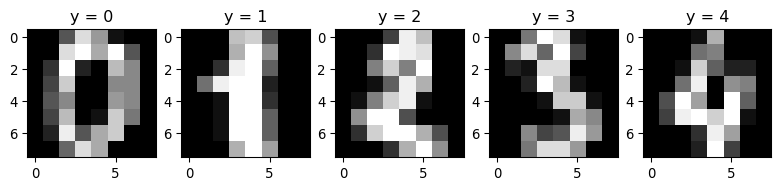

-   Dans notre ensemble de données, chaque $x_i$ est un **vecteur
    d’attributs** de taille $D = 64$.

-   Ce vecteur est formé en concaténant les lignes d’une image de
    $8 \times 8$.

-   La fonction `reshape` est utilisée pour convertir ce vecteur de 64
    dimensions en son format original d’image $8 \times 8$.

## Chiffres manuscrits

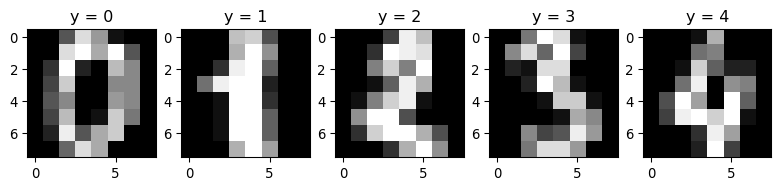

-   Nous allons entraîner **10 classificateurs**, chacun correspondant à
    un chiffre spécifique dans une approche **Un-contre-Tous (OvA)**.

-   Chaque classificateur déterminera les valeurs optimales des
    $\theta_j$ (associées aux attributs pixels), lui permettant de
    distinguer un chiffre de tous les autres.

## Chiffres manuscrits

Préparation de notre expérience en apprentissage automatique

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## Chiffres manuscrits

Les algorithmes d’optimisation fonctionnent généralement mieux lorsque
les attributs ont des plages de valeurs similaires.

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Discussion** : importance d’appliquer `fit_transform` uniquement à
`X_train`

## Chiffres manuscrits

In [32]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(multi_class='ovr')
clf = clf.fit(X_train, y_train)

/Users/turcotte/opt/micromamba/envs/ai/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(

Demander au classificateur de résoudre une tâche multiclasses en
utilisant **un-contre-tous (OvR)**, aussi connu sous le nom d’OvA. Les
classificateurs dans `sklearn` ont un [support multiclasse
intégré](https://scikit-learn.org/stable/modules/multiclass.html).

Chaque régression logistique trouve un **hyperplan** dans un **espace à
64 dimensions** qui sépare les données en deux classes.

## Chiffres manuscrits

Application du classificateur à notre ensemble de test

In [33]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.87      0.93      0.90        14
           2       0.93      1.00      0.96        13
           3       1.00      0.94      0.97        17
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        12
           8       0.96      0.92      0.94        25
           9       1.00      1.00      1.00        15

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180


## Visualisation

Combien de classes ?

In [34]:
clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

. . .

Les coefficients et les intercepts sont dans des tableaux distincts.

In [35]:
(clf.coef_.shape, clf.intercept_.shape)

((10, 64), (10,))

. . .

Les intercepts sont $\theta_0$, tandis que les coefficients sont
$\theta_j, j \in [1,64]$.

Adapté de [MNIST digits classification using Logistic regression in
Scikit-Learn](https://atmamani.github.io/projects/ml/mnist-digits-classification-using-logistic-regression-scikit-learn/),
consulté le 2024-09-23.

## Visualisation

In [36]:
clf.coef_[0].round(2).reshape(width, height)

array([[ 0.  , -0.17,  0.  ,  0.24, -0.01, -0.7 , -0.38, -0.06],
       [-0.01, -0.27, -0.14,  0.45,  0.55,  0.85,  0.03, -0.2 ],
       [-0.04,  0.33,  0.41, -0.16, -0.95,  0.84,  0.06, -0.13],
       [-0.04,  0.24,  0.11, -0.64, -1.73,  0.14,  0.2 , -0.01],
       [ 0.  ,  0.4 ,  0.51, -0.6 , -1.7 , -0.07,  0.03,  0.  ],
       [-0.09, -0.15,  0.88, -0.94, -0.74,  0.  ,  0.3 ,  0.01],
       [-0.06, -0.26,  0.45,  0.11,  0.23,  0.07, -0.4 , -0.49],
       [ 0.  , -0.14, -0.37,  0.5 , -0.61, -0.1 , -0.31, -0.27]])

## Visualisation

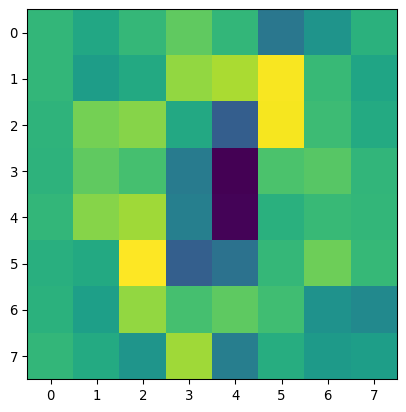

In [37]:
coef = clf.coef_
plt.imshow(coef[0].reshape(width, height))

## Visualisation

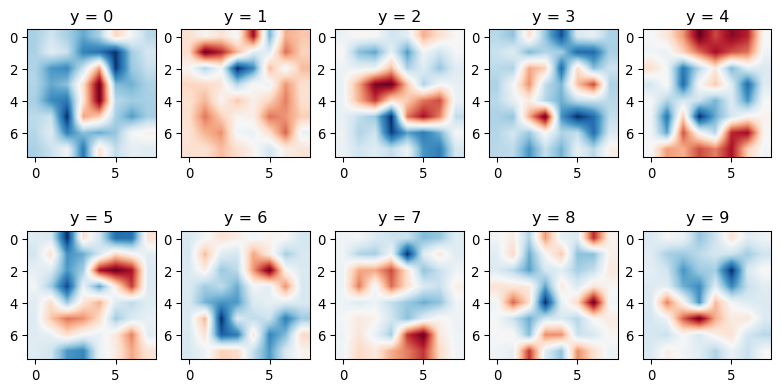

In [38]:
plt.figure(figsize=(10,5))

for index in range(len(clf.classes_)):
    plt.subplot(2, 5, index + 1)
    plt.title(f'y = {clf.classes_[index]}')
    plt.imshow(clf.coef_[index].reshape(width, height),
               cmap=plt.cm.RdBu,
               interpolation='bilinear')

Chaque `LogisticRegression` apprend `D=64` paramètres $\theta_j$.

Dans les images ci-dessus, les pixels rouges correspondent à des
coefficients négatifs, tandis que les pixels bleus correspondent à des
coefficients positifs.

Pour le premier classificateur, qui prédit le chiffre ‘0’, le modèle
attribue des poids négatifs aux pixels de haute intensité au centre de
l’image et des poids positifs aux pixels de haute intensité dans la
région ovale entourant le centre.

------------------------------------------------------------------------

<https://youtu.be/AX-ZEC-71DI>

**Attribution**: [Machine Learning and Logistic
Regression](https://youtu.be/AX-ZEC-71DI), IBM Technology, 2024-07-19.

# Prologue

## Références

Russell, Stuart, et Peter Norvig. 2020. *Artificial Intelligence: A
Modern Approach*. 4ᵉ éd. Pearson. <http://aima.cs.berkeley.edu/>.

## Ressource

-   [Logistic Regression 3-class
    Classifier](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html)
    par `sklearn`
-   [Plot the decision surface of decision trees trained on the iris
    dataset](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html)
    par `sklearn`
-   [Decision
    trees](https://kirenz.github.io/classification/docs/trees.html) par
    [Jan Kirenz](https://kirenz.github.io), un Professeur à HdM
    Stuttgart
-   [CS 320 Apr12-2021 (Part 2) - Decision
    Boundaries](https://www.youtube.com/watch?v=cWYgtUU9COg) par [Tyler
    Caraza-Harter](https://tyler.caraza-harter.com), un instructeur à
    UW-Madison

## Prochain cours

-   Évaluation croisée et mesures de performance

## Graphique 3D avec des points en dessous et au-dessus du plan

In [39]:
from mpl_toolkits.mplot3d import Axes3D

# Function to generate points
def generate_points_above_below_plane(num_points=100):
    # Define the plane z = ax + by + c
    a, b, c = 1, 1, 0  # Plane coefficients

    # Generate random points
    x1 = np.random.uniform(-10, 10, num_points)
    x2 = np.random.uniform(-10, 10, num_points)

    y1 = np.random.uniform(-10, 10, num_points)
    y2 = np.random.uniform(-10, 10, num_points)

    # Points above the plane
    z_above = a * x1 + b * y1 + c + np.random.normal(20, 2, num_points)

    # Points below the plane
    z_below = a * x2 + b * y2 + c - np.random.normal(20, 2, num_points)

    # Stack the points into arrays
    points_above = np.vstack((x1, y1, z_above)).T
    points_below = np.vstack((x2, y2, z_below)).T

    return points_above, points_below

# Generate points
points_above, points_below = generate_points_above_below_plane()

# Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points above the plane
ax.scatter(points_above[:, 0], points_above[:, 1], points_above[:, 2], c='r', label='Above the plane')

# Plot points below the plane
ax.scatter(points_below[:, 0], points_below[:, 1], points_below[:, 2], c='b', label='Below the plane')

# Plot the plane itself for reference
xx, yy = np.meshgrid(range(-10, 11), range(-10, 11))
zz = 1 * xx + 1 * yy + 0
ax.plot_surface(xx, yy, zz, alpha=0.2, color='gray')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set title and legend
ax.set_title('3D Points Above and Below a Plane')
ax.legend()

# Show plot
plt.show()

------------------------------------------------------------------------

Marcel **Turcotte**

<Marcel.Turcotte@uOttawa.ca>

École de **science informatique** et de génie électrique (**SI**GE)

Université d’Ottawa

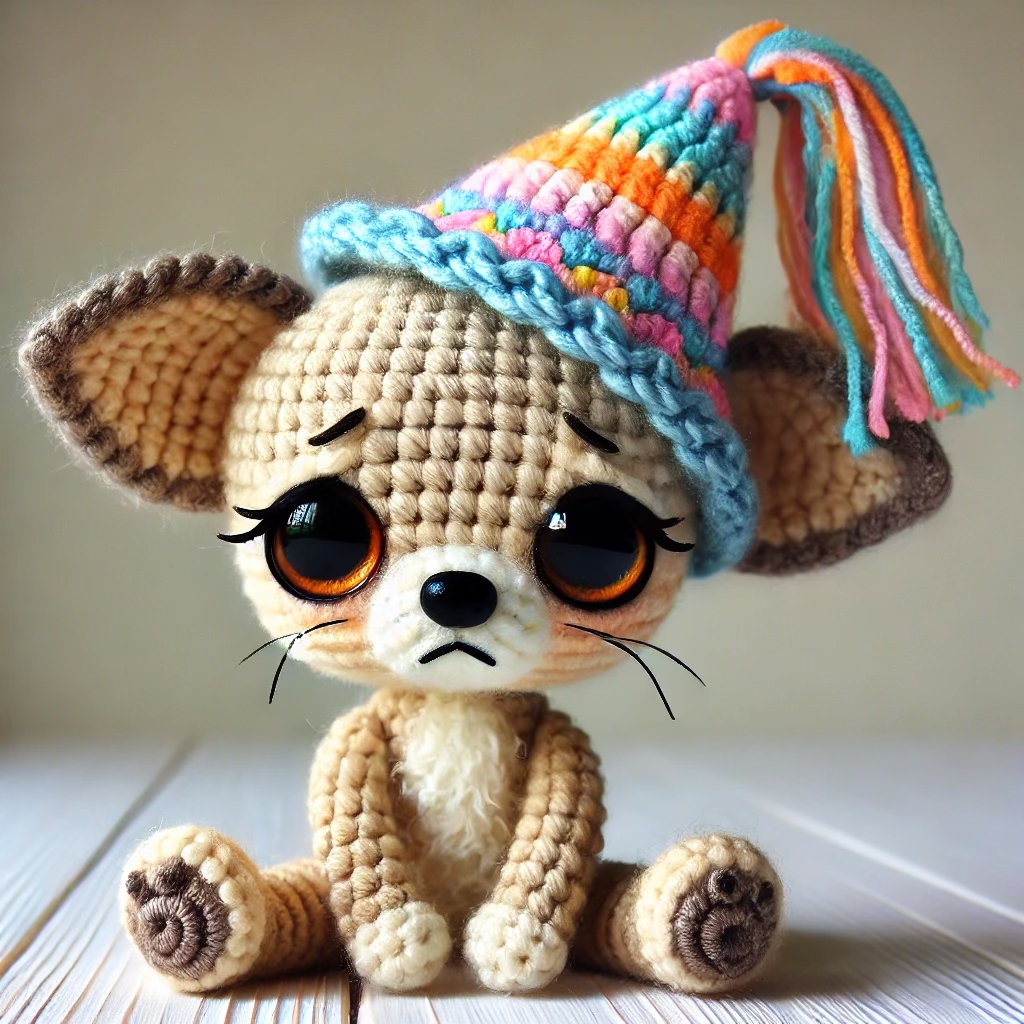

**Attribution**: “An image of a sad Chihuahua amigurumi with a birthday
hat.” Générée par DALL-E, via ChatGPT (GPT-4), OpenAI, 16 septembre,
2024.